<a href="https://colab.research.google.com/github/chaiminwoo0223/Data-Analysis/blob/main/07%20-%20example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
mpg = pd.read_csv('/content/drive/MyDrive/수업/데이터 분석 입문/강의자료/Data/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


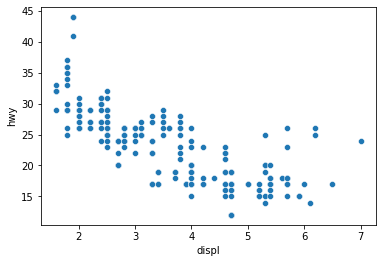

In [3]:
# x축은 displ, y축은 hwy를 나타낸 산점도 그리기
import seaborn as sns
sns.scatterplot(data = mpg,x = 'displ',y = 'hwy')

[(3.0, 6.0)]

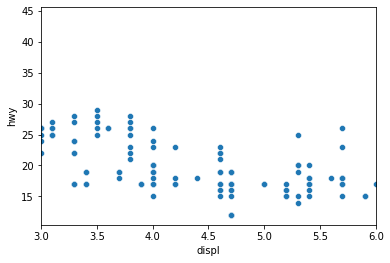

In [4]:
# x축 범위 3~6으로 제한
sns.scatterplot(data = mpg,x = 'displ',y = 'hwy').set(xlim = (3,6))

[(10.0, 30.0), (3.0, 6.0)]

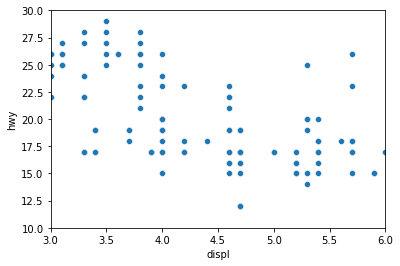

In [5]:
# x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg,x = 'displ',y = 'hwy').set(xlim = (3,6),ylim = (10,30))

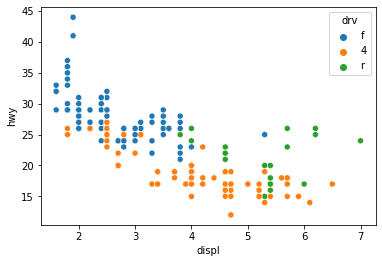

In [6]:
# drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg,x = 'displ',y = 'hwy',hue = 'drv')

In [7]:
df_mpg = mpg.groupby('drv')\
            .agg(mean_hwy = ('hwy','mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [8]:
df_mpg = mpg.groupby('drv',as_index = False)\
            .agg(mean_hwy = ('hwy','mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


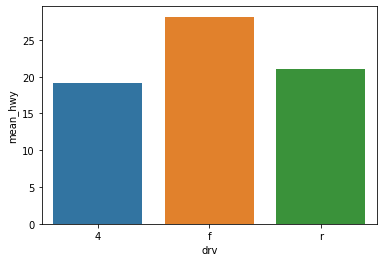

In [9]:
# x축은 drv, y축은 mean_hwy를 나타낸 막대 그래프 그리기
sns.barplot(data = df_mpg,x = 'drv',y = 'mean_hwy')

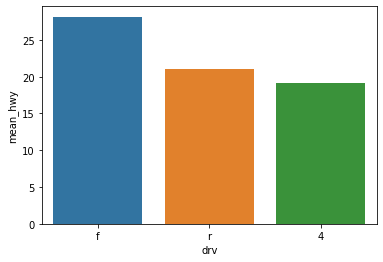

In [10]:
# sort_values(): 데이터 프레임을 내림차순 정렬
df_mpg = df_mpg.sort_values('mean_hwy',ascending = False)
sns.barplot(data = df_mpg,x = 'drv',y = 'mean_hwy')

In [11]:
# drv별 빈도표 만들기
df_mpg = mpg.groupby('drv',as_index = False)\
            .agg(n = ( 'drv','count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


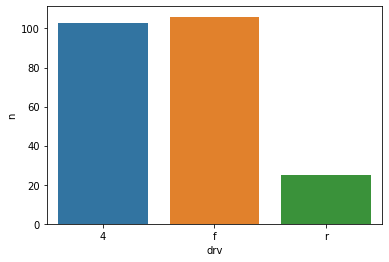

In [12]:
# 막대 그래프 그리기
sns.barplot(data = df_mpg,x = 'drv',y = 'n')

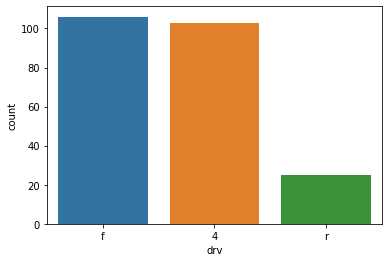

In [13]:
# 빈도 막대 그래프 그리기
sns.countplot(data = mpg,x = 'drv')

In [14]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [15]:
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

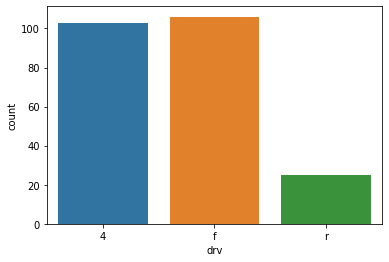

In [16]:
# 4, f, r 순으로 빈도 막대 정렬
sns.countplot(data = mpg,x = 'drv',order = ['4','f','r'])

In [17]:
# drv의 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object')

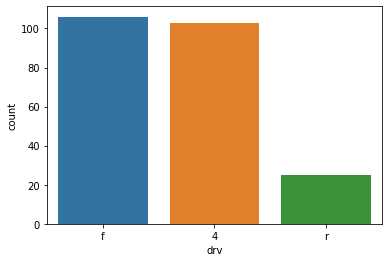

In [18]:
# drv 빈도가 높은 순으로 빈도 막대 정렬
sns.countplot(data = mpg,x = 'drv',order = mpg['drv'].value_counts().index)

In [19]:
# 실습1: 산점도 만들기

In [20]:
# 문제1

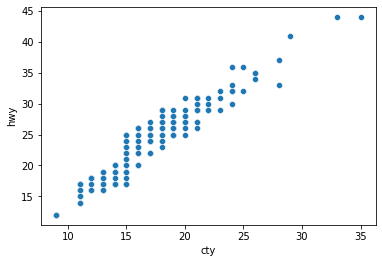

In [21]:
sns.scatterplot(data = mpg,x = 'cty',y = 'hwy')

In [22]:
# 문제2

In [23]:
midwest = pd.read_csv('/content/drive/MyDrive/수업/데이터 분석 입문/강의자료/Data/midwest.csv')
midwest

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,3048,WAUKESHA,WI,0.034,304715,8962.205880,298313,1096,672,2699,...,35.396784,7.667090,299802,98.387674,3.121060,3.785820,2.590061,4.085479,1,HLU
433,3049,WAUPACA,WI,0.045,46104,1024.533330,45695,22,125,92,...,16.549869,3.138596,44412,96.330036,8.488697,10.071411,6.953799,10.338641,0,AAR
434,3050,WAUSHARA,WI,0.037,19385,523.918919,19094,29,70,43,...,15.064584,2.620907,19163,98.854785,13.786985,20.050708,11.695784,11.804558,0,AAR
435,3051,WINNEBAGO,WI,0.035,140320,4009.142860,136822,697,685,1728,...,24.995504,5.659847,133950,95.460376,8.804031,10.592031,8.660587,6.661094,1,HAU


[(0.0, 10000.0), (0.0, 500000.0)]

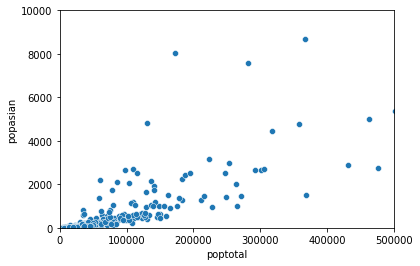

In [24]:
sns.scatterplot(data = midwest,x = 'poptotal',y = 'popasian').set(xlim = (0,500000),ylim = (0,10000))

In [25]:
# 실습2

In [26]:
# 문제1

In [27]:
df_suv = mpg.query("category == 'suv'")
df_suv

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
...,...,...,...,...,...,...,...,...,...,...,...
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
178,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv
198,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv


In [28]:
df_suv = mpg.query("category == 'suv'")\
            .groupby('manufacturer',as_index = False)\
            .agg(mean_cty = ('cty','mean'))\
            .sort_values('mean_cty',ascending = False)\
            .head()
df_suv

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


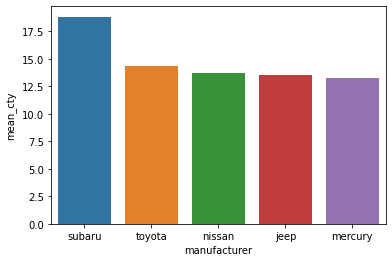

In [29]:
sns.barplot(data = df_suv,x = 'manufacturer',y = 'mean_cty')

In [30]:
# 문제2

In [31]:
df_category = mpg.groupby('category',as_index = False)\
            .agg(n = ( 'category','count'))\
            .sort_values('n',ascending = False)
df_category

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


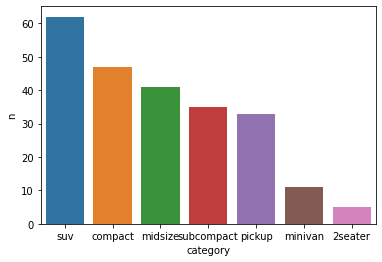

In [32]:
sns.barplot(data = df_category,x = 'category',y = 'n')